# Lab 6.2 Contaminant Transport in Groundwater

### Problem 5 in Homework 6
Consider a sand tube of diameter 12.0 cm and an effective porosity of 39.0% that is
transmitting flow at a rate of $1.16 cm^{3}/s$. Calculate the relative concentration ($C/C_0$) at a distance of 1.0 m down the length of the column using the Ogata and Banks (1961) solution.  For this, please modify and use either the code provided below.  Plot relative concentration versus time over a range of times such that the entire breakthrough can be seen for two different coefficients of hydrodynamic dispersion: $1.0 x 10^{-5} m^{2}/s$ and $1.0 x 10^{-6} m^{2}/s$.  



In [1]:
import numpy as np
import scipy.stats as st
import statistics as stats
import matplotlib.pyplot as plt

%matplotlib inline

First, we define the variables that we are given.

In [9]:
Q=1.16 
# discharge in cm3/s, as defined
diameter = 12 
# sand tube diameter in cm, as defined

Atube=np.pi*(diameter/2)**2 
# area of the tube, in cm^2

Vcm=Q/Atube 
# velocity through the tube, in cm/s

Vm=Vcm/100 
#convert to meters, this is effective velocity, but we need seepage velocity

ne=0.39
# effective porosity, as defined
                             
V=Vm/ne 
#Vseepage = effective velocity divided by effective porosity
# here we have seepage velocity in m/s

x = 1
#location of interest in m

D1 = 10**(-5)
# coefficient of hydrodynamic dispersion, in m^2/s

D2 = 10**(-6)
# second specified coefficient of hydrodynamic dispersion, in m^2/s
print(D2)

1e-06


#### We are told to use the Ogata and Banks solution
Lets review what this is:

In the first week of class, we learned that the advection diffusion equation is
$$\frac{\partial C}{\partial t} = -v\frac{\partial C}{\partial x} + D\frac{\partial ^2 C}{\partial x^2}$$
where
C = concentration [ML-3]

t = time [T]

v = the average seepage velocity [LT-1] (where seepage velocity is the same as the average linear velocity (Darcy velocity) divided by the effective porosity)

x = distance along the flowpath [L]

D = coefficient of hydrodynamic dispersion [L2 T-1]

For the case of a continuous source of infinite duration, the initial and boundary conditions are given by:

$C(x,0) = 0$ for $x \geq 0$

$C(0,t) = C_0$ for $t \geq 0$

$C(\infty,t) = 0$ for $t \geq 0$

where $C_0$ is the concentration at the upstream boundary [ML-3].

The analytical solution is give by [Ogata and Banks, 1961](https://pubs.er.usgs.gov/publication/pp411A) as
$$ C(x,t) = \frac{C_0}{2}[erfc\left(\frac{x-vt}{\sqrt{4Dt}}\right) + exp\left(\frac{vx}{D}\right)erfc\left(\frac{x+vt}{\sqrt{4Dt}}\right)]$$

where erfc is the complementary error function, a mathematical function derived from basic statists as:

$$ erfc(x) = \frac{2}{\sqrt{\pi}} \int_x^\infty e^{-t^{2}}dt  = 1 - erf(x)$$

Ogata and Banks (1961) state that the second term can be dropped with a maximum error of three percent for values of $\frac{D}{vx}<0.002$.  Thus, for most cases, we can use:
$$ C(x,t) = \frac{C_0}{2}[erfc\left(\frac{x-vt}{\sqrt{4Dt}}\right)]$$

In [6]:
# we need to import the erfc (complimentary error function)
from scipy import special

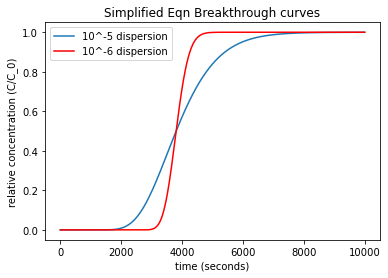

In [16]:
# create timeseries t in seconds
t = np.arange(1, 10000, 10)
# This creates an array within the range of 0 to 3*3600, with a step of 10.  

#first, simplified version
input_to_erfc1 = (x-V*t)/np.sqrt(4*D1*t);
output_from_erfc1 = special.erfc(input_to_erfc1);

input_to_erfc2 = (x-V*t)/np.sqrt(4*D2*t);
output_from_erfc2 = special.erfc(input_to_erfc2);

# you need to add more code to get C/C0
Cratio1 = 0.5*output_from_erfc1;
Cratio2 = 0.5*output_from_erfc2;


# Plot
plt.figure()
plt.plot(t, Cratio1, label = '10^-5 dispersion')
plt.plot(t, Cratio2, color='red', label='10^-6 dispersion')
plt.xlabel('time (seconds)')
plt.ylabel('relative concentration (C/C_0)')
plt.legend(loc='best')
plt.title('Simplified Eqn Breakthrough curves');

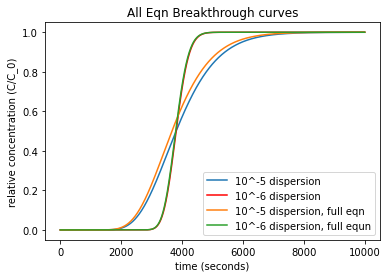

In [17]:
# Now, create another graph with the more complicated solution to see how they differ.

input3=(x+(V*t))/(2*np.sqrt(D1*t));
Cratio3=0.5*output_from_erfc1 + 0.5*np.exp(V*x/D1)*special.erfc(input3);
Cratio4=0.5*output_from_erfc2 + 0.5*np.exp(V*x/D2)*special.erfc((x+V*t)/(2*np.sqrt(D2*t)));

plt.figure()
plt.plot(t, Cratio1, label = '10^-5 dispersion')
plt.plot(t, Cratio2, color='red', label='10^-6 dispersion')
plt.plot(t, Cratio3, label = '10^-5 dispersion, full eqn')
plt.plot(t, Cratio4, label='10^-6 dispersion, full equn')
plt.xlabel('time (seconds)')
plt.ylabel('relative concentration (C/C_0)')
plt.legend(loc='best')
plt.title('All Eqn Breakthrough curves');

# Discussion
The errors between the simplified and full equations are small.  Try changing various values going into the variables within the equation and see how things change.  Do you understand what changes the shape and timing of the distribution?  (If not, ask questions in class.)

**(b)** Now that you have plotted the breakthrough curves for these two solutes, consider their physical behavior in the environment. What if an industrial manufacturer spilled these two solutes into an aquifer that also serves as a water supply? Your job is to monitor their concentration in a down-gradient monitoring well. Based on your breakthrough curves, discuss what you expect to see. For example, which solute will appear first? Which will remain the longest? If you find the opposite, what might be the explanation?